In [1]:
import keras
from keras.models import Sequential
from keras.layers import  BatchNormalization
from keras.preprocessing import image
import tensorflow as tf 
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import History 
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D  
from keras import backend as K


In [11]:
img_width, img_height = 150, 150
train_data_dir = 'C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/train'        
validation_data_dir = 'C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/test'
nb_train_samples = 8000        
nb_validation_samples = 1600   
epochs = 30
batch_size = 32

In [12]:
if K.image_data_format() == 'channels_first':

    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3) 


train_datagen = ImageDataGenerator(
rescale=1. / 255,   
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

In [13]:
test_datagen =ImageDataGenerator (rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size=(img_width, img_height),
batch_size=batch_size,
class_mode ='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
) 

Found 8000 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


In [14]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), input_shape = [150,150,3]))
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2, 2)))

model1.summary ()

model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))

model1.add(Conv2D(128, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
Total params: 1,024
Trainable params: 960
Non-trainable params: 64
_________________________________________________________________


In [15]:
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add (Dense(1))
model1.add(Activation('sigmoid'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
activation_6 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)       

In [16]:
model1.compile(loss ='binary_crossentropy',optimizer ='Adam',metrics = ['accuracy'])

In [17]:
history=model1.fit_generator(
train_generator,
steps_per_epoch=nb_train_samples // batch_size,
epochs =epochs,
validation_data= validation_generator,
validation_steps =nb_validation_samples // batch_size)

Epoch 1/30
250/250 [==============================] - 276s 1s/step - loss: 0.4260 - accuracy: 0.8342 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 2/30
250/250 [==============================] - 276s 1s/step - loss: 0.3416 - accuracy: 0.8641 - val_loss: 0.4725 - val_accuracy: 0.7812
Epoch 3/30
250/250 [==============================] - 275s 1s/step - loss: 0.3384 - accuracy: 0.8696 - val_loss: 1.1911 - val_accuracy: 0.5731
Epoch 4/30
250/250 [==============================] - 273s 1s/step - loss: 0.3199 - accuracy: 0.8720 - val_loss: 0.4661 - val_accuracy: 0.8050
Epoch 5/30
250/250 [==============================] - 277s 1s/step - loss: 0.3145 - accuracy: 0.8748 - val_loss: 0.4397 - val_accuracy: 0.8144
Epoch 6/30
250/250 [==============================] - 284s 1s/step - loss: 0.3073 - accuracy: 0.8786 - val_loss: 0.4614 - val_accuracy: 0.8119
Epoch 7/30
250/250 [==============================] - 280s 1s/step - loss: 0.2934 - accuracy: 0.8809 - val_loss: 0.3699 - val_accuracy: 0.8431

In [18]:
model1.save('cnn1.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: cnn1.model\assets


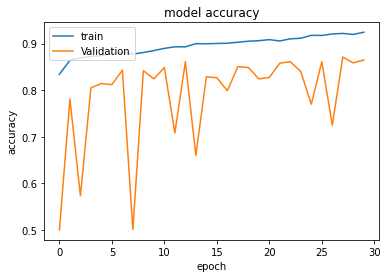

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()